In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import sys

In [2]:
# Import functions directly from github
# Important: note that we use raw.githubusercontent.com, not github.com

# import requests
# url = 'https://raw.githubusercontent.com/florisvb/Nonlinear_and_Data_Driven_Estimation/main/Utility/plot_utility.py'
# r = requests.get(url)

# # Store the file to the colab working directory
# with open('plot_utility.py', 'w') as f:
#     f.write(r.text)


sys.path.append("../Utility") # go to parent dir
# import the function we want from that file
from plot_utility import plot_tme

In [3]:
inv = np.linalg.inv

# Generate sample time series data

Same as Linear Least Squares example.

In [4]:
t = np.linspace(0, 3, 600)
x = np.array([[1, 1, 2, -0.4e-4]]).T
H = np.vstack([t, np.sin(t), np.cos(2*t), np.exp(t)]).T
y = H@x

# Two sensors

In [13]:
noise_mean = 0

noise_std_1 = 20
noise_std_2 = 0.5

v = []
v_std = []
noise_i = 1
n_chunks = 0
while len(v)<len(t):
    if noise_i == 1:
        noise_i = 2
        noise_std = noise_std_2
        chunk_size = 50
    else:
        noise_i = 1
        noise_std = noise_std_1
        chunk_size = 150
        
    v_std = np.hstack( (v_std, [noise_std]*chunk_size) ) 
    v = np.hstack( (v, np.random.normal(noise_mean, noise_std, chunk_size)) )
    n_chunks += 1

v_std = v_std[0:len(t)]
v = v[0:len(t)]

v_std = np.column_stack(v_std).T
v = np.column_stack(v).T

y_tilde = y+v

In [14]:
n_chunks

6

# Plotting

<Axes: xlabel='Time', ylabel='y'>

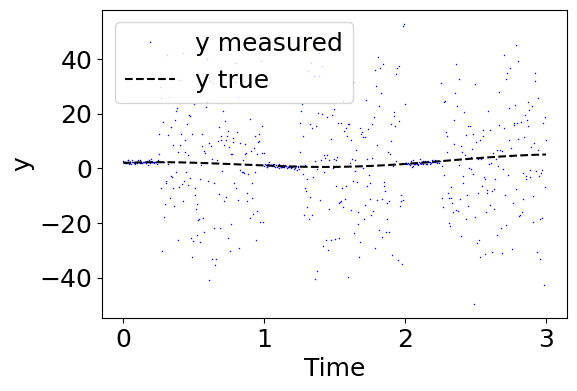

In [15]:
plot_tme(t, y, y_tilde)

# Candidate models

In [16]:
model_1_H = np.vstack([t, np.sin(t), np.cos(2*t)]).T

# Minimum Variance Estimate: Gauss-Markov Theorem

$\mathbf{\hat{x}}=(H^{\top}R^{-1}H)^{-1}H^{\top}R^{-1}\mathbf{\tilde{y}}$

In [19]:
R = np.diag( np.ravel(v_std)**2)
print(R)
R.shape

[[2.5e-01 0.0e+00 0.0e+00 ... 0.0e+00 0.0e+00 0.0e+00]
 [0.0e+00 2.5e-01 0.0e+00 ... 0.0e+00 0.0e+00 0.0e+00]
 [0.0e+00 0.0e+00 2.5e-01 ... 0.0e+00 0.0e+00 0.0e+00]
 ...
 [0.0e+00 0.0e+00 0.0e+00 ... 4.0e+02 0.0e+00 0.0e+00]
 [0.0e+00 0.0e+00 0.0e+00 ... 0.0e+00 4.0e+02 0.0e+00]
 [0.0e+00 0.0e+00 0.0e+00 ... 0.0e+00 0.0e+00 4.0e+02]]


(600, 600)

### Model 1

In [10]:
x_1_hat = inv(model_1_H.T@inv(R)@model_1_H)@model_1_H.T@inv(R)@y_tilde

<Axes: xlabel='Time', ylabel='y'>

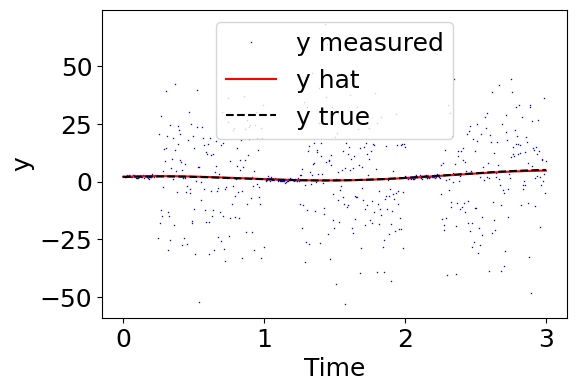

In [11]:
y_1_hat = model_1_H@x_1_hat
plot_tme(t, y, y_tilde, y_1_hat)

In [12]:
x_error = x_1_hat - x[0:3]
print(x_error)

[[-0.14696995]
 [ 0.30202257]
 [ 0.09008252]]


# Residuals

<Axes: xlabel='Time', ylabel='y'>

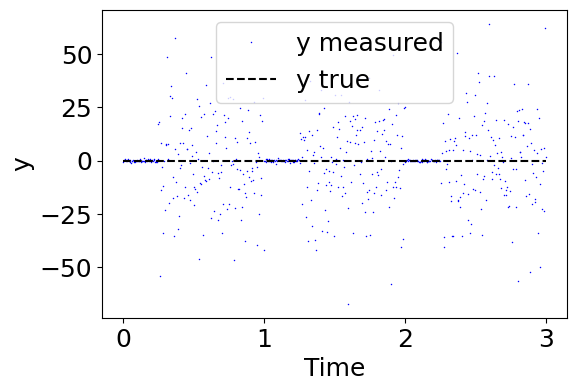

In [302]:
residuals_1 = y_tilde - y_1_hat
plot_tme(t, np.ones_like(t)*np.mean(residuals_1), residuals_1)

# Histogram of residuals

In [315]:
N1 = scipy.stats.norm(noise_mean, noise_std_1)
xr = np.linspace(-100, 100, 1000)
pdf1 = N1.pdf(xr)

N2 = scipy.stats.norm(noise_mean, noise_std_2)
pdf2 = N2.pdf(xr)

pdf = (pdf1*3 + pdf2*1) / 4

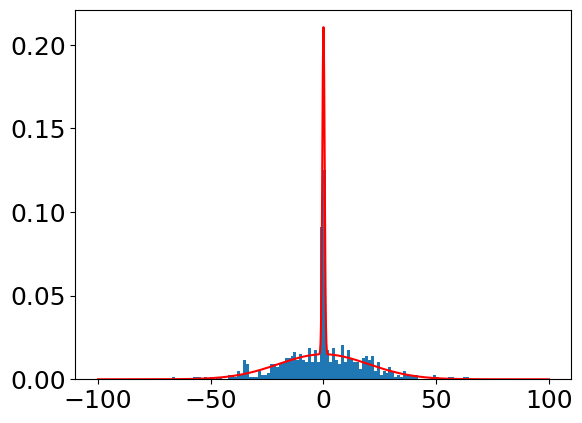

In [316]:
plt.hist(residuals_1, density=True, bins=100)
plt.plot(xr, pdf, color='red')

# Exercise

Use the wrong R for the minimum variance estimate. Do the errors in the estimate of x get worse?

<Axes: xlabel='Time', ylabel='y'>

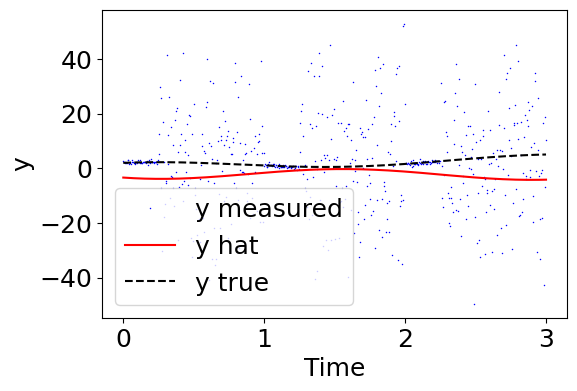

In [65]:
R2 = np.random.rand(len(t)) * 1
# R2 = np.
R2 = np.eye(len(t)) * R2

x_2_hat = inv(model_1_H.T@inv(R2)@model_1_H)@model_1_H.T@inv(R2)@y_tilde
y_2_hat = model_1_H@x_2_hat
plot_tme(t, y, y_tilde, y_2_hat)

In [66]:
x2_error = x_2_hat - x[0:3]
print(x2_error)

[[-1.13871948]
 [-4.43487317]
 [-5.38482329]]


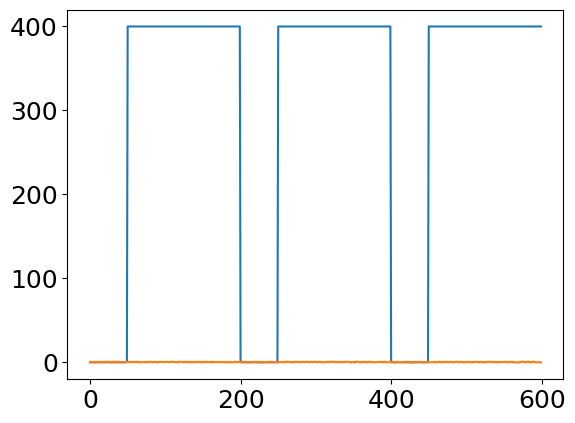

In [67]:
plt.plot(np.diag(R))
plt.plot(np.diag(R2))